# Creating a network 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
%matplotlib inline
import pandas as pd

df = pd.read_excel(r'D:\Notes\VI SEM\SNA\Source Data.xlsx')
df1 = pd.DataFrame(df,columns=['Name','Who motivates you to workout?','Friend 1'])
df1.head(76)
print (df1)


                      Name Who motivates you to workout?         Friend 1
0          Medha S Shettar                        Family              NaN
1                  Pramila                       Friends              NaN
2               Ritika Das                        Family              NaN
3         Manjunath Suresh                       Friends              NaN
4                 Pratibha                        Family              NaN
5            Jakir Hussain                       Friends              NaN
6                 Bhoomika                        Family              NaN
7            Yasmeen Mulla                       Friends              NaN
8     P.Andal SriVaishnavi                        Family              NaN
9                  Apoorva                        Family              NaN
10                  Anuhya                       Friends              NaN
11                 Umabala                        Family              NaN
12            Sagar Sajeev            

C:\Users\Aishwarya\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Aishwarya\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


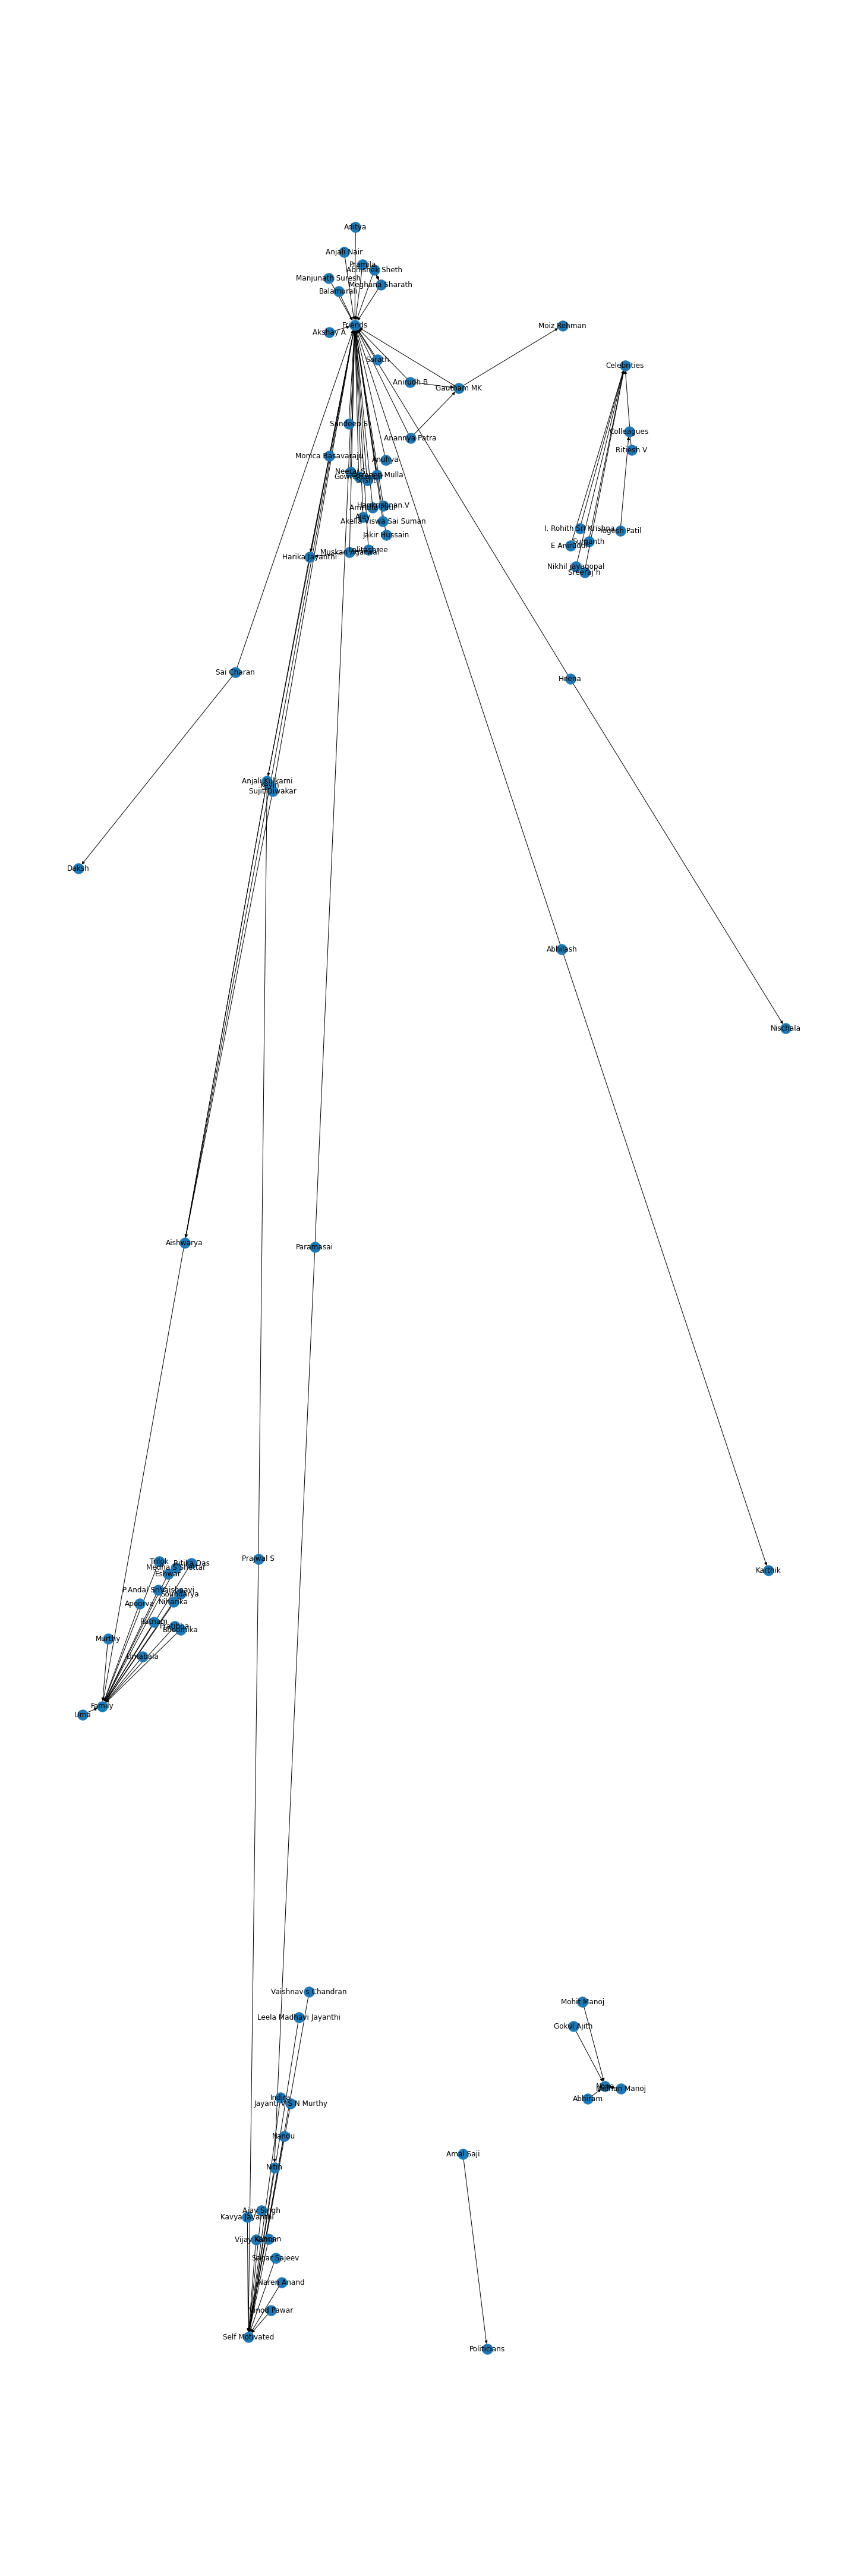

In [2]:
G = nx.DiGraph()
plt.rcParams["figure.figsize"] = (20,60)
for i in range(len(df1)) :
    if G.has_node(df1.loc[i, "Name"]) :
        continue
    else: G.add_node(df1.loc[i, "Name"])  

for i in range(len(df1)) :
    if G.has_node(df1.loc[i, "Who motivates you to workout?"]) :
        continue
    else: G.add_node(df1.loc[i, "Who motivates you to workout?"])
    
for i in range(len(df1)) :
    value = df1.loc[i, "Friend 1"]
    if pd.isnull(value):
        continue
    G.add_node(df1.loc[i, "Friend 1"])
    
for i in range(len(df1)):
    G.add_edge(df1.loc[i, "Name"],df1.loc[i, "Who motivates you to workout?"])

for i in range(len(df1)):
    value = df1.loc[i, "Friend 1"]
    if pd.isnull(value):
        continue
    G.add_edge(df1.loc[i, "Name"],df1.loc[i,"Friend 1"])     
    
nx.draw(G,with_labels=True)
plt.draw()
plt.show()


In [3]:
print(nx.info(G))
print(nx.is_directed(G))

Name: 
Type: DiGraph
Number of nodes: 86
Number of edges: 93
Average in degree:   1.0814
Average out degree:   1.0814
True


In [4]:
print('Degree Centrality:',nx.degree_centrality(G))
diction1 = nx.in_degree_centrality(G)
keymax = max(diction1, key=diction1.get)
print ('Degree Centrality:',keymax)

diction2 = diction1
keys_to_remove = ['Friends', 'Family', 'Colleagues', 'Politicians', 'Celebrities', 'None', 'Self Motivated']
for key in keys_to_remove:
    del diction2[key]
keymax2 = max(diction2, key=diction2.get)
print ('Degree Centrality within class:',keymax2)


Degree Centrality: {'Medha S Shettar': 0.011764705882352941, 'Pramila': 0.011764705882352941, 'Ritika Das': 0.011764705882352941, 'Manjunath Suresh': 0.011764705882352941, 'Pratibha': 0.011764705882352941, 'Jakir Hussain': 0.011764705882352941, 'Bhoomika': 0.011764705882352941, 'Yasmeen Mulla': 0.011764705882352941, 'P.Andal SriVaishnavi': 0.011764705882352941, 'Apoorva': 0.011764705882352941, 'Anuhya': 0.011764705882352941, 'Umabala': 0.011764705882352941, 'Sagar Sajeev': 0.011764705882352941, 'Amritha Patil': 0.011764705882352941, 'Ratnam': 0.011764705882352941, 'Anannya Patra': 0.023529411764705882, 'E Aniruddh': 0.011764705882352941, 'Nikhil jayagopal': 0.011764705882352941, 'Kannan': 0.011764705882352941, 'Mohit Manoj': 0.011764705882352941, 'Sandeep S': 0.011764705882352941, 'Sreeraj h': 0.011764705882352941, 'Gokul Ajith': 0.011764705882352941, 'Akella Viswa Sai Suman': 0.011764705882352941, 'Sarath': 0.011764705882352941, 'Sumanth': 0.011764705882352941, 'Harikrishnan.V': 0.011

In [5]:
print('Density of the graph is:',nx.density(G))

Density of the graph is: 0.012722298221614227


In [6]:
print("Clustering:", nx.clustering(G))
print('Average Clustering is:',nx.average_clustering(G))
diction3 = nx.clustering(G)
keymax3 = max(diction3, key=diction3.get)
print('Max Clustering: ',keymax3)

Clustering: {'Medha S Shettar': 0, 'Pramila': 0, 'Ritika Das': 0, 'Manjunath Suresh': 0, 'Pratibha': 0, 'Jakir Hussain': 0, 'Bhoomika': 0, 'Yasmeen Mulla': 0, 'P.Andal SriVaishnavi': 0, 'Apoorva': 0, 'Anuhya': 0, 'Umabala': 0, 'Sagar Sajeev': 0, 'Amritha Patil': 0, 'Ratnam': 0, 'Anannya Patra': 0.5, 'E Aniruddh': 0, 'Nikhil jayagopal': 0, 'Kannan': 0, 'Mohit Manoj': 0, 'Sandeep S': 0, 'Sreeraj h': 0, 'Gokul Ajith': 0, 'Akella Viswa Sai Suman': 0, 'Sarath': 0, 'Sumanth': 0, 'Harikrishnan.V': 0, 'Nandu': 0, 'I. Rohith Sri Krishna': 0, 'Balamurali': 0, 'Midhun Manoj': 0, 'Akshay A': 0, 'Soundarya': 0, 'Ajay': 0, 'Amal Saji': 0, 'Jayanti V S N Murthy': 0, 'Neeraj S': 0, 'Vaishnav s Chandran': 0, 'Yogesh Patil': 0, 'Uma': 0, 'Eshwar': 0, 'Murthy': 0, 'Kavya Jayanthi': 0, 'Gowrishankar': 0, 'Trilok': 0, 'Indira': 0, 'Srishti': 0, 'Niharika': 0, 'Anjali Nair': 0, 'Aishwarya': 0, 'Leela Madhavi Jayanthi': 0, 'Ritiesh V': 0, 'Naren Anand': 0, 'Anjali Kulkarni': 0.05555555555555555, 'Sujit Diwak

In [7]:
print('Diameter of the network:', nx.degree(G))

diction4 = dict(nx.degree(G))
keymax4 = max(diction4, key=diction4.get)
print('Maximum Diamter: ',keymax4)

Diameter of the network: [('Medha S Shettar', 1), ('Pramila', 1), ('Ritika Das', 1), ('Manjunath Suresh', 1), ('Pratibha', 1), ('Jakir Hussain', 1), ('Bhoomika', 1), ('Yasmeen Mulla', 1), ('P.Andal SriVaishnavi', 1), ('Apoorva', 1), ('Anuhya', 1), ('Umabala', 1), ('Sagar Sajeev', 1), ('Amritha Patil', 1), ('Ratnam', 1), ('Anannya Patra', 2), ('E Aniruddh', 1), ('Nikhil jayagopal', 1), ('Kannan', 1), ('Mohit Manoj', 1), ('Sandeep S', 1), ('Sreeraj h', 1), ('Gokul Ajith', 1), ('Akella Viswa Sai Suman', 1), ('Sarath', 1), ('Sumanth', 1), ('Harikrishnan.V', 1), ('Nandu', 1), ('I. Rohith Sri Krishna', 1), ('Balamurali', 1), ('Midhun Manoj', 1), ('Akshay A', 1), ('Soundarya', 1), ('Ajay', 1), ('Amal Saji', 1), ('Jayanti V S N Murthy', 1), ('Neeraj S', 1), ('Vaishnav s Chandran', 1), ('Yogesh Patil', 1), ('Uma', 1), ('Eshwar', 1), ('Murthy', 1), ('Kavya Jayanthi', 1), ('Gowrishankar', 1), ('Trilok', 1), ('Indira', 1), ('Srishti', 1), ('Niharika', 1), ('Anjali Nair', 1), ('Aishwarya', 5), ('Le

In [8]:
pr = nx.pagerank(G, alpha=0.9)
print(pr)
diction5 = nx.pagerank(G, alpha=0.9)
keymax5 = max(diction5, key=diction5.get)
print('Maximum Pagerank value: ',keymax5)

{'Medha S Shettar': 0.006141734245239089, 'Pramila': 0.006141734245239089, 'Ritika Das': 0.006141734245239089, 'Manjunath Suresh': 0.006141734245239089, 'Pratibha': 0.006141734245239089, 'Jakir Hussain': 0.006141734245239089, 'Bhoomika': 0.006141734245239089, 'Yasmeen Mulla': 0.006141734245239089, 'P.Andal SriVaishnavi': 0.006141734245239089, 'Apoorva': 0.006141734245239089, 'Anuhya': 0.006141734245239089, 'Umabala': 0.006141734245239089, 'Sagar Sajeev': 0.006141734245239089, 'Amritha Patil': 0.006141734245239089, 'Ratnam': 0.006141734245239089, 'Anannya Patra': 0.006141734245239089, 'E Aniruddh': 0.006141734245239089, 'Nikhil jayagopal': 0.006141734245239089, 'Kannan': 0.006141734245239089, 'Mohit Manoj': 0.006141734245239089, 'Sandeep S': 0.006141734245239089, 'Sreeraj h': 0.006141734245239089, 'Gokul Ajith': 0.006141734245239089, 'Akella Viswa Sai Suman': 0.006141734245239089, 'Sarath': 0.006141734245239089, 'Sumanth': 0.006141734245239089, 'Harikrishnan.V': 0.006141734245239089, 'N